In [2]:
# import rarfile, csv
import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
#ignore warnings when creating datetime columns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Defining functions

In [60]:
def station_timeline(station_id, selected_day):
    """
    Input : ID of a Bicing Station + a given day on a string format %Y-%m-%d
    Output : sub df with all Bicing logs from taht staion on that given day & plot of the day logs
    """
    
    sub_df_selected_day = df[df['last_reported_dt'].dt.strftime('%Y-%m-%d') == selected_day]
#   old  version : 
# testing lambda function sub_df_selected_day['daytime'] = sub_df_selected_day["last_reported_dt"].apply(lambda date : datetime.strptime(date, "%H-%M-%s"))

    sub_df_selected_day['daytime'] = sub_df_selected_day["last_reported_dt"].dt.time
    
    station = sub_df_selected_day.query(f'station_id == {station_id}')
    station.plot(x='daytime' , y='num_bikes_available' , style='-')
    
    return station

### Data cleaning - ETL

In [4]:
# rar_path = rarfile.RarFile("2020_01_Gener_BicingNou_ESTACIONS.rar")
# csv_file_name = "2020_01_Gener_BicingNou_ESTACIONS.csv"
# rar_file = rarfile.RarFile.open(rar_path, csv_file_name)
# csv_reader = csv.reader(rar_file, delimiter=',')

# # Should output first line of file (typically CSV header)
# print(csv_reader.next())

In [5]:
df = pd.read_csv('2020_01_Gener_BicingNou_ESTACIONS.zip', compression='zip', header=0, sep=',', quotechar='"')

In [6]:
df

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,is_installed,is_renting,is_returning,last_reported,is_charging_station,status,last_updated,ttl
0,1,21,21,0,23,1,1,1,1.577833e+09,True,IN_SERVICE,1577833223,28
1,2,10,9,1,16,1,1,1,1.577833e+09,True,IN_SERVICE,1577833223,28
2,3,15,15,0,9,1,1,1,1.577833e+09,True,IN_SERVICE,1577833223,28
3,4,8,8,0,13,1,1,1,1.577833e+09,True,IN_SERVICE,1577833223,28
4,5,14,11,3,24,1,1,1,1.577833e+09,True,IN_SERVICE,1577833223,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3398703,474,7,5,2,8,1,1,1,1.580511e+09,True,IN_SERVICE,1580511301,10
3398704,492,2,2,0,22,1,1,1,1.580511e+09,True,IN_SERVICE,1580511301,10
3398705,494,0,0,0,24,1,1,1,1.580511e+09,True,IN_SERVICE,1580511301,10
3398706,495,3,2,1,19,1,1,1,1.580511e+09,True,IN_SERVICE,1580511301,10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3398708 entries, 0 to 3398707
Data columns (total 13 columns):
station_id                              int64
num_bikes_available                     int64
num_bikes_available_types.mechanical    int64
num_bikes_available_types.ebike         int64
num_docks_available                     int64
is_installed                            int64
is_renting                              int64
is_returning                            int64
last_reported                           float64
is_charging_station                     bool
status                                  object
last_updated                            int64
ttl                                     int64
dtypes: bool(1), float64(1), int64(10), object(1)
memory usage: 314.4+ MB


In [8]:
#df['last_reported'] = df['last_reported'].astype(int)

df['last_reported'] = np.int64(df['last_reported'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3398708 entries, 0 to 3398707
Data columns (total 13 columns):
station_id                              int64
num_bikes_available                     int64
num_bikes_available_types.mechanical    int64
num_bikes_available_types.ebike         int64
num_docks_available                     int64
is_installed                            int64
is_renting                              int64
is_returning                            int64
last_reported                           int64
is_charging_station                     bool
status                                  object
last_updated                            int64
ttl                                     int64
dtypes: bool(1), int64(11), object(1)
memory usage: 314.4+ MB


In [10]:
df['last_reported_dt'] = pd.to_datetime(df['last_reported'],  unit = 's')

In [11]:
df['last_reported_dt']

0         2019-12-31 22:56:44
1         2019-12-31 22:57:58
2         2019-12-31 22:56:20
3         2019-12-31 22:58:50
4         2019-12-31 22:58:50
                  ...        
3398703   2020-01-31 22:54:35
3398704   2020-01-31 22:54:37
3398705   2020-01-31 22:53:53
3398706   2020-01-31 22:53:44
3398707   2020-01-31 22:51:06
Name: last_reported_dt, Length: 3398708, dtype: datetime64[ns]

In [12]:
# datetime.datetime(df['last_reported_dt'], tzinfo=tzoffset(None, 3600))

In [13]:
# pd.Timestamp(np.int64(df['last_reported']))

In [14]:
# pd.Timestamp(df['last_reported_dt'])

In [15]:
# df['last_reported_dt2'] = pd.Timestamp(df['last_reported_dt'],  unit = 's')

In [16]:
# Timestamp(numpy.datetime64('2012-05-01T01:00:00.000000'))

In [17]:
df

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,is_installed,is_renting,is_returning,last_reported,is_charging_station,status,last_updated,ttl,last_reported_dt
0,1,21,21,0,23,1,1,1,1577833004,True,IN_SERVICE,1577833223,28,2019-12-31 22:56:44
1,2,10,9,1,16,1,1,1,1577833078,True,IN_SERVICE,1577833223,28,2019-12-31 22:57:58
2,3,15,15,0,9,1,1,1,1577832980,True,IN_SERVICE,1577833223,28,2019-12-31 22:56:20
3,4,8,8,0,13,1,1,1,1577833130,True,IN_SERVICE,1577833223,28,2019-12-31 22:58:50
4,5,14,11,3,24,1,1,1,1577833130,True,IN_SERVICE,1577833223,28,2019-12-31 22:58:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3398703,474,7,5,2,8,1,1,1,1580511275,True,IN_SERVICE,1580511301,10,2020-01-31 22:54:35
3398704,492,2,2,0,22,1,1,1,1580511277,True,IN_SERVICE,1580511301,10,2020-01-31 22:54:37
3398705,494,0,0,0,24,1,1,1,1580511233,True,IN_SERVICE,1580511301,10,2020-01-31 22:53:53
3398706,495,3,2,1,19,1,1,1,1580511224,True,IN_SERVICE,1580511301,10,2020-01-31 22:53:44


In [55]:
# pg_exposicio = df.query('station_id== 234')

In [56]:
# pg_exposicio['hour'] = pg_exposicio["last_reported_dt"].apply(lambda date : datetime.strptime(date, "%H-%M-%s"))

In [57]:
# df['last_reported_dt'].dt.date

<ipython-input-60-65d14085cb11>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df_selected_day['daytime'] = sub_df_selected_day["last_reported_dt"].dt.time


,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,is_installed,is_renting,is_returning,last_reported,is_charging_station,status,last_updated,ttl,last_reported_dt,daytime
123633,234,0,0,0,27,1,1,1,1577923321,True,IN_SERVICE,1577923502,7,2020-01-02 00:02:01,00:02:01
124043,234,0,0,0,27,1,1,1,1577923586,True,IN_SERVICE,1577923802,6,2020-01-02 00:06:26,00:06:26
124453,234,0,0,0,27,1,1,1,1577923852,True,IN_SERVICE,1577924116,20,2020-01-02 00:10:52,00:10:52
124863,234,0,0,0,27,1,1,1,1577924380,True,IN_SERVICE,1577924425,30,2020-01-02 00:19:40,00:19:40
125273,234,0,0,0,27,1,1,1,1577924642,True,IN_SERVICE,1577924726,29,2020-01-02 00:24:02,00:24:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239663,234,9,7,2,18,1,1,1,1578008380,True,IN_SERVICE,1578008399,3,2020-01-02 23:39:40,23:39:40
240073,234,9,7,2,18,1,1,1,1578008643,True,IN_SERVICE,1578008703,7,2020-01-02 23:44:03,23:44:03
240483,234,9,7,2,18,1,1,1,1578008905,True,IN_SERVICE,1578009016,20,2020-01-02 23:48:25,23:48:25
240893,234,10,7,3,17,1,1,1,1578009169,True,IN_SERVICE,1578009322,26,2020-01-02 23:52:49,23:52:49


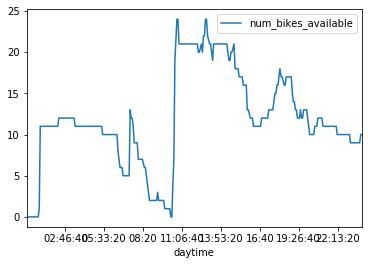

In [61]:
station_timeline(234, "2020-01-02")

In [ ]:
pg_exposicio_plot = pg_exposicio[["last_reported_dt","num_bikes_available"]]
pg_exposicio_plot.plot(x='last_reported_dt', y='num_bikes_available', style='-')

In [ ]:
ih_bikes["last_reported_dt"]

In [21]:
#We will check Ironhack's closest station and see how does it behave on a regular day.
ironhack = df[df['station_id'] == 211]
ih_bikes = ironhack[["last_reported_dt","num_bikes_available"]]
ih_bikes["last_reported_hours"] = datetime.time(ih_bikes["last_reported_dt"])


ih_bikes["last_reported_hours"]
#ih_bikes_day = ih_bikes[ih_bikes["last_reported_dt"].str.startswith('2020-01-27')]

i#h_bikes_day.plot(x='last_reported_dt', y='num_bikes_available', style='-')

TypeError: descriptor 'time' for 'datetime.datetime' objects doesn't apply to a 'Series' object

In [22]:
ironhack["last_reported_dt"]

200       2019-12-31 22:58:19
610       2019-12-31 23:02:38
1020      2019-12-31 23:07:01
1430      2019-12-31 23:11:23
1840      2019-12-31 23:15:45
                  ...        
3396843   2020-01-31 22:33:29
3397256   2020-01-31 22:37:52
3397669   2020-01-31 22:42:13
3398082   2020-01-31 22:46:37
3398495   2020-01-31 22:50:56
Name: last_reported_dt, Length: 8257, dtype: datetime64[ns]

In [23]:
#We will check Ironhack's closest station and see how does it behave on a regular day.
ironhack = df[df['station_id'] == 211]
ih_bikes = ironhack[["last_reported_dt","num_bikes_available"]]

In [24]:
ih_bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8257 entries, 200 to 3398495
Data columns (total 2 columns):
last_reported_dt       8257 non-null datetime64[ns]
num_bikes_available    8257 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 193.5 KB


In [28]:
ih_bikes['daytime'] = ih_bikes["last_reported_dt"].dt.time

<ipython-input-28-4aef0ff2f8b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ih_bikes['daytime'] = ih_bikes["last_reported_dt"].dt.time


In [26]:
ih_bikes['daytime']

200        22:58:19
610        23:02:38
1020       23:07:01
1430       23:11:23
1840       23:15:45
             ...   
3396843    22:33:29
3397256    22:37:52
3397669    22:42:13
3398082    22:46:37
3398495    22:50:56
Name: daytime, Length: 8257, dtype: object

In [ ]:
#We will check Ironhack's closest station and see how does it behave on a regular day.
ironhack = df[df['station_id'] == 211]
ih_bikes = ironhack[["last_reported_dt","num_bikes_available"]]
ih_bikes["last_reported_dt"] = ih_bikes["last_reported_dt"].astype(str)
ih_bikes_day = ih_bikes[ih_bikes["last_reported_dt"].str.startswith('2020-01-02')]

In [ ]:
ih_bikes_day

In [ ]:
ih_bikes_day.plot(x='last_reported_dt', y='num_bikes_available', style='-')
